In [32]:
%run ../utils.ipynb

In [53]:
import pandas as pd
import os
import missingno as msno
import numpy as np

In [54]:
data_dir = project_dir + 'data\\matchup_player_data\\'

In [55]:
files = [file for file in os.listdir(data_dir) if ( file[0].isnumeric() and file[-4:] == '.csv')]

In [59]:
files

['2015_matchup_player_data.csv',
 '2016_matchup_player_data.csv',
 '2017_matchup_player_data.csv',
 '2018_matchup_player_data.csv',
 '2019_matchup_player_data.csv',
 '2020_matchup_player_data.csv',
 '2021_matchup_player_data.csv',
 '2022_matchup_player_data.csv',
 '2023_matchup_player_data.csv']

In [56]:
for file in files:
    sdf = pd.read_csv(data_dir + file)
    sdf['season'] = file[:4]
    sdf.to_csv(f"{project_dir}\\{file[:4]}_matchup_player_data.csv", index=False)

In [60]:
df = pd.concat(
    map(pd.read_csv, files), ignore_index=True
)
    

In [61]:
df

,QB,QB_player_key,QB_points,WR1,WR1_player_key,WR1_points,WR2,WR2_player_key,WR2_points,RB1,...,season,BN7,BN7_player_key,BN7_points,WR3,WR3_player_key,WR3_points,IR,IR_player_key,IR_points
0,Tom Brady,348.p.5228,25.70,Dez Bryant,348.p.23999,7.3,A.J. Green,348.p.24791,8.8,Carlos Hyde,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sam Bradford,348.p.23976,11.20,Julio Jones,348.p.24793,30.6,Nelson Agholor,348.p.28408,1.0,Chris Ivory,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Philip Rivers,348.p.6763,17.27,Calvin Johnson,348.p.8256,4.9,Andre Johnson,348.p.6339,4.4,C.J. Anderson,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tony Romo,348.p.6624,19.77,Jordan Matthews,348.p.27570,15.2,Eric Decker,348.p.24062,10.7,Jeremy Hill,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron Rodgers,348.p.7200,21.80,Demaryius Thomas,348.p.23997,9.5,Jeremy Maclin,348.p.9283,7.7,Mark Ingram II,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Kyler Murray,423.p.31833,21.68,CeeDee Lamb,423.p.32687,33.7,Odell Beckham Jr.,423.p.27540,3.8,Breece Hall,...,2023,NaN,NaN,NaN,NaN,NaN,NaN,Christian Kirk,423.p.31017,0.0
2054,Tua Tagovailoa,423.p.32675,14.88,Cooper Kupp,423.p.30182,10.7,Diontae Johnson,423.p.31898,8.6,Javonte Williams,...,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,Baker Mayfield,423.p.30971,16.26,Deebo Samuel,423.p.31868,15.7,Justin Jefferson,423.p.32692,8.4,Rachaad White,...,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,Russell Wilson,423.p.25785,0.00,DK Metcalf,423.p.31896,13.1,Elijah Moore,423.p.33422,14.6,Aaron Jones,...,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.head()

,QB,QB_player_key,QB_points,WR1,WR1_player_key,WR1_points,WR2,WR2_player_key,WR2_points,RB1,...,season,BN7,BN7_player_key,BN7_points,WR3,WR3_player_key,WR3_points,IR,IR_player_key,IR_points
0,Tom Brady,348.p.5228,25.70,Dez Bryant,348.p.23999,7.3,A.J. Green,348.p.24791,8.8,Carlos Hyde,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sam Bradford,348.p.23976,11.20,Julio Jones,348.p.24793,30.6,Nelson Agholor,348.p.28408,1.0,Chris Ivory,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Philip Rivers,348.p.6763,17.27,Calvin Johnson,348.p.8256,4.9,Andre Johnson,348.p.6339,4.4,C.J. Anderson,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tony Romo,348.p.6624,19.77,Jordan Matthews,348.p.27570,15.2,Eric Decker,348.p.24062,10.7,Jeremy Hill,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron Rodgers,348.p.7200,21.80,Demaryius Thomas,348.p.23997,9.5,Jeremy Maclin,348.p.9283,7.7,Mark Ingram II,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

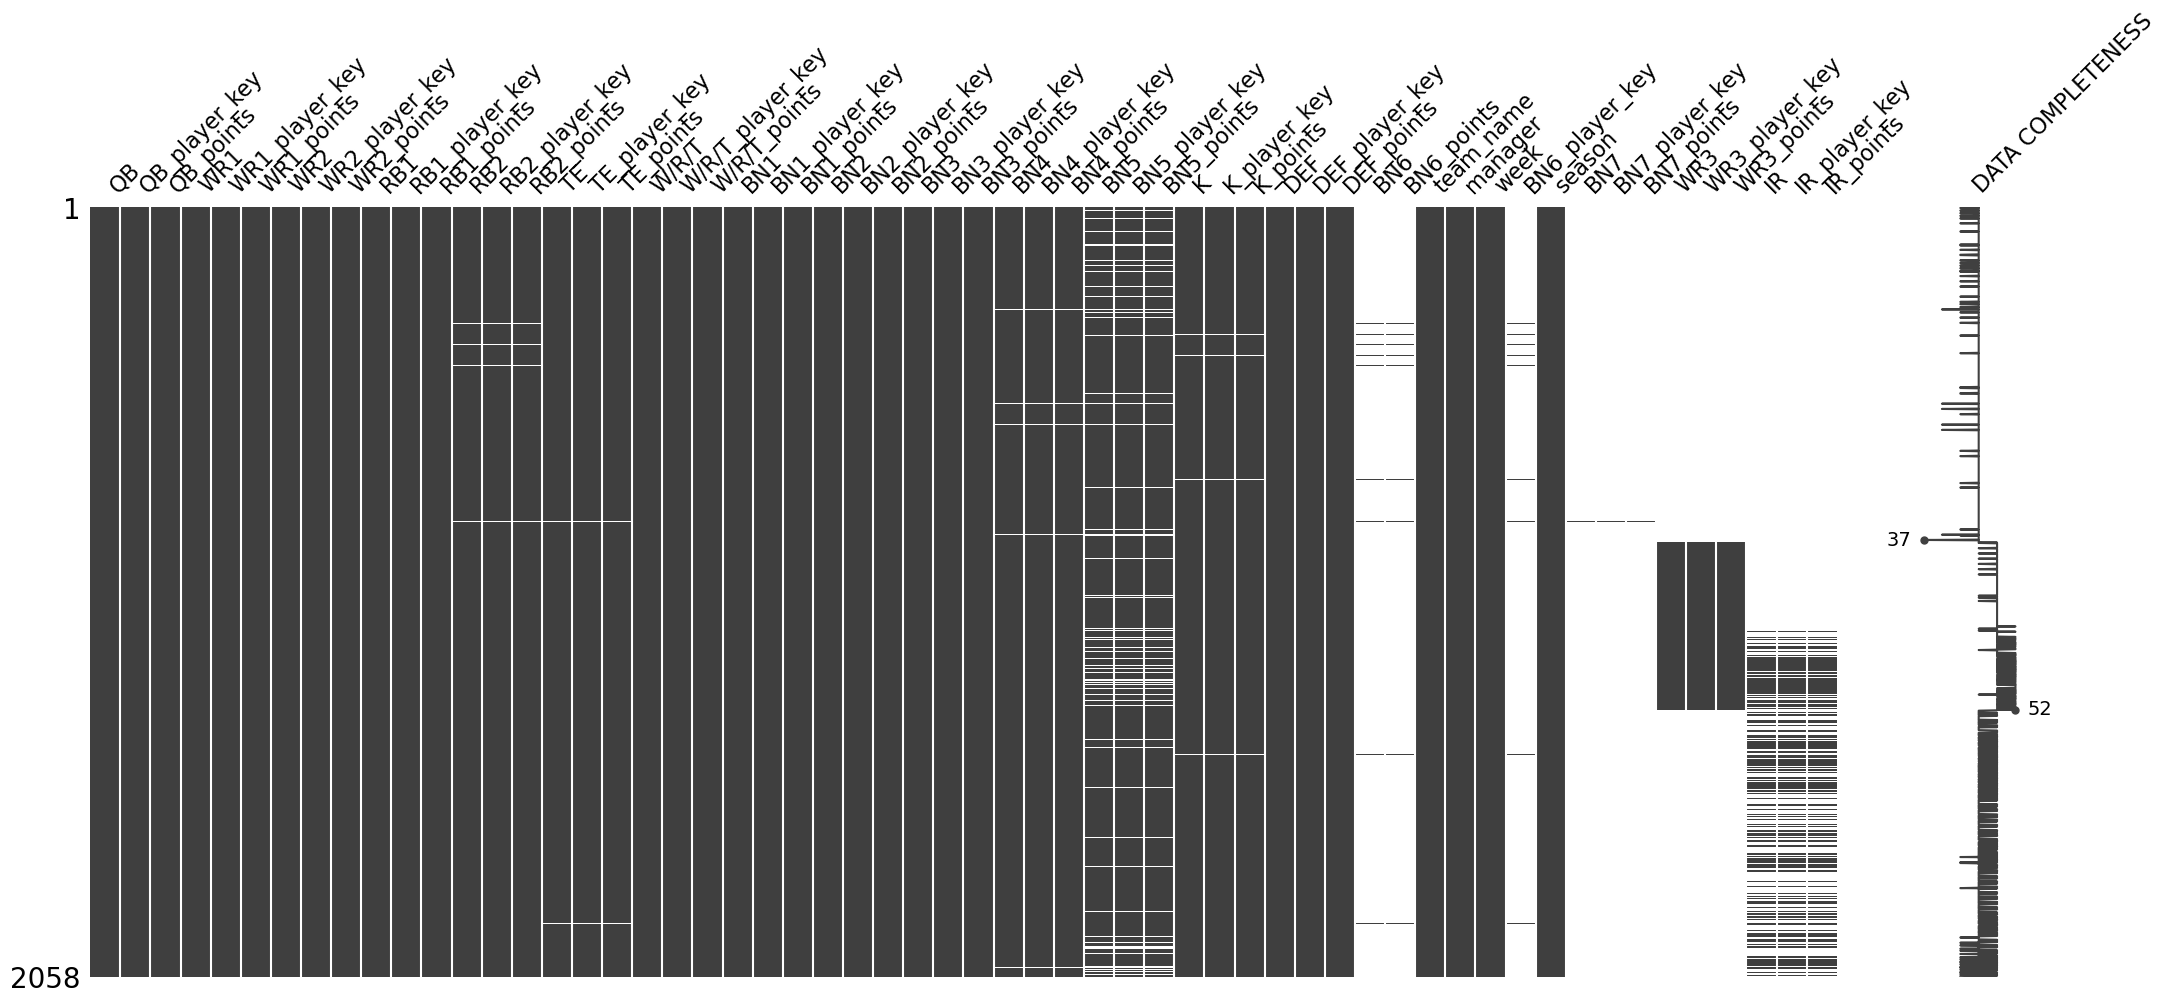

In [63]:
msno.matrix(df, labels=True)

In [64]:
num_cols = list(df.select_dtypes(np.number).columns)

In [65]:
obj_cols = list(df.select_dtypes(exclude=np.number).columns)

In [66]:
for col in num_cols:
    df[col] = df[col].replace(np.nan, 0)

In [67]:
for col in obj_cols:
    df[col] = df[col].replace(np.nan, 'none')

<Axes: >

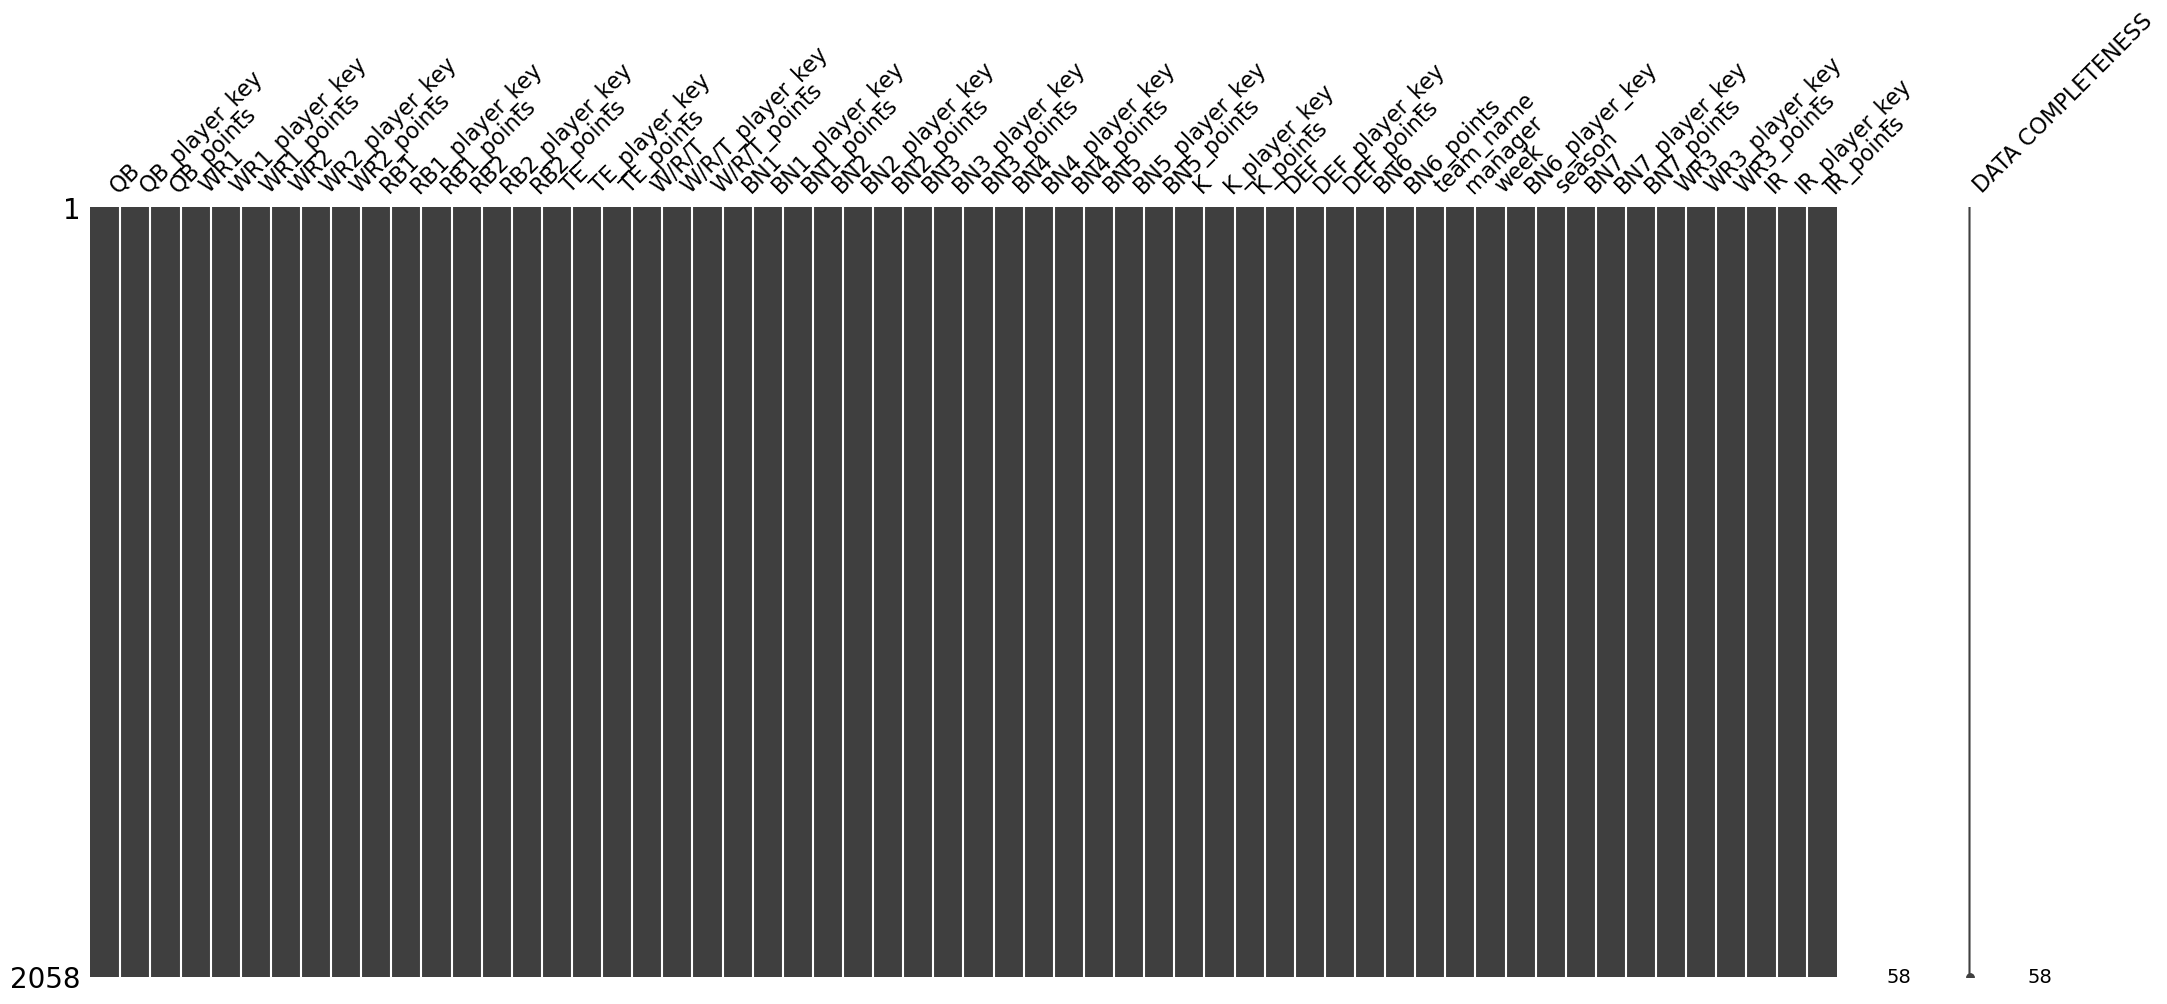

In [68]:
msno.matrix(df, labels=True)

In [69]:
export_path = os.environ['BASE_PATH'] + 'data\\matchup_player_data\\'

In [70]:
df.to_csv(export_path + 'matchup_player_data_through_2023.csv', index=False)